# statiscal measure

In [2]:
 import numpy as np

In [3]:
values=np.array([2,3,5,10,100])

In [4]:
np.mean(values)

24.0

In [5]:
np.median(values)

5.0

In [6]:
np.std(values)

38.09986876617818

In [7]:
np.var(values)

1451.6

# cov and corr

In [8]:
x=np.array([1,2,3])
y=np.array([4,5,6])
z=np.array([3,2,1])

In [9]:
cov =np.sum((x-np.mean(x))*(y-np.mean(y)))/len(x)

In [10]:
print (cov)

0.6666666666666666


In [11]:
corr=(cov)/(np.std(x)*np.std(y))

In [12]:
print (corr)

1.0


In [13]:
cov =np.sum((x-np.mean(x))*(z-np.mean(z)))/len(z)

In [14]:
corr=(cov)/(np.std(x)*np.std(z))

In [15]:
print (corr)

-1.0


# linear regreesion 

In [16]:
import pandas as pd 

In [17]:
df=pd.read_csv('gpa_iq.csv')

In [18]:
df

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58
...,...,...,...,...,...
73,85,9.000,112,1,60
74,86,9.500,112,1,70
75,87,6.057,114,2,51
76,88,6.057,93,1,21


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

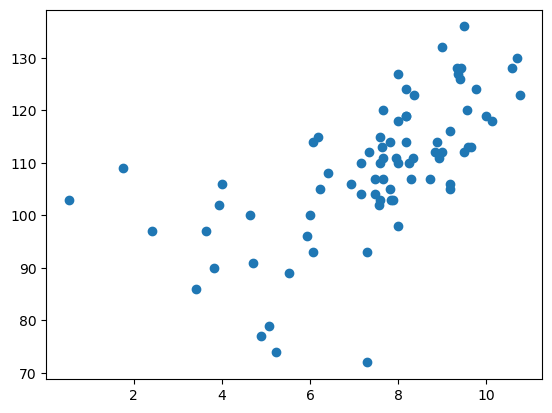

In [20]:
plt.scatter(df['gpa'],df['iq'])

In [21]:
! pip install scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr =LinearRegression()

In [24]:
lr.fit(df['gpa'].values.reshape(-1,1),df['iq'])

LinearRegression()

In [25]:
lr.coef_

array([3.97552835])

In [26]:
lr.intercept_

79.31915213096524

In [27]:
preds=lr.predict(df['gpa'].values.reshape(-1,1))

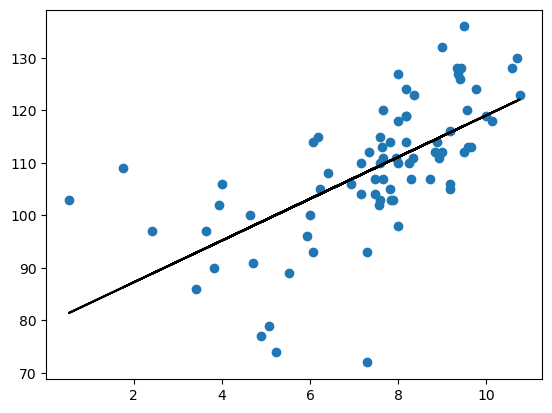

In [28]:
plt.scatter(df['gpa'],df['iq'])
plt.plot(df['gpa'],preds,color='black')

In [29]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [30]:
mean_squared_error(df['iq'],preds)

102.47378984427493

In [31]:
r2_score(df['iq'],preds)

0.4016146290075625

In [32]:
mean_absolute_error(df['iq'],preds)

7.6020382754059055

 # polynomial features

In [33]:
x=df['gpa']

In [34]:
y=df['iq']

In [35]:
x=x.values.reshape(-1,1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


degree= 1
berfor poly 0.4016146290075625
after poly 0.4016146290075624


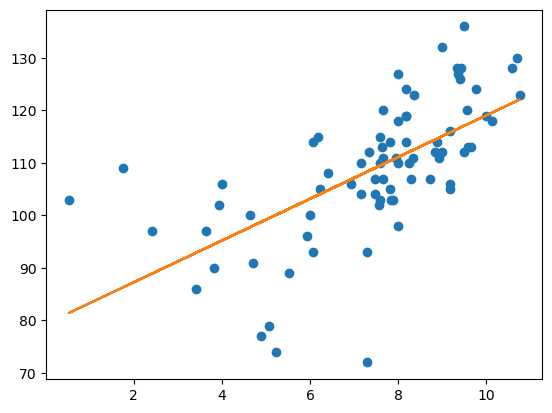

degree= 2
berfor poly 0.4016146290075625
after poly 0.5020806150434085


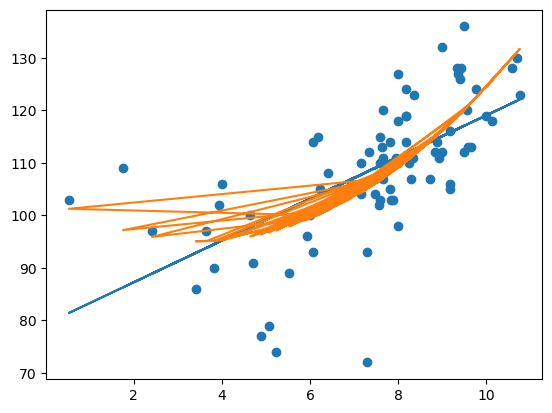

degree= 3
berfor poly 0.4016146290075625
after poly 0.5235389724511927


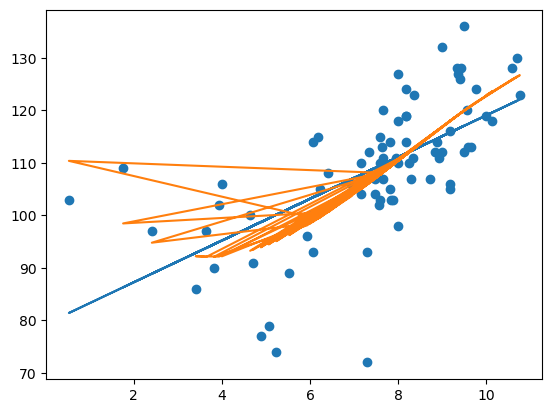

degree= 4
berfor poly 0.4016146290075625
after poly 0.5303205662733735


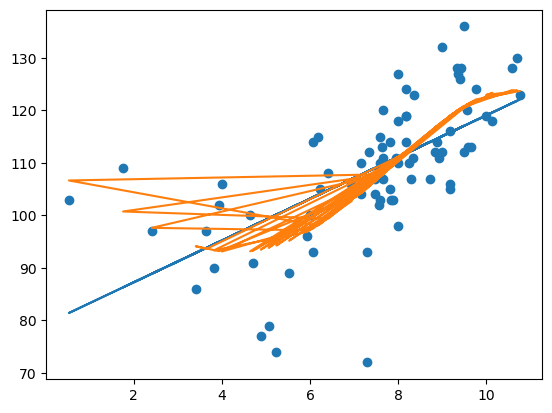

degree= 5
berfor poly 0.4016146290075625
after poly 0.5414115612333767


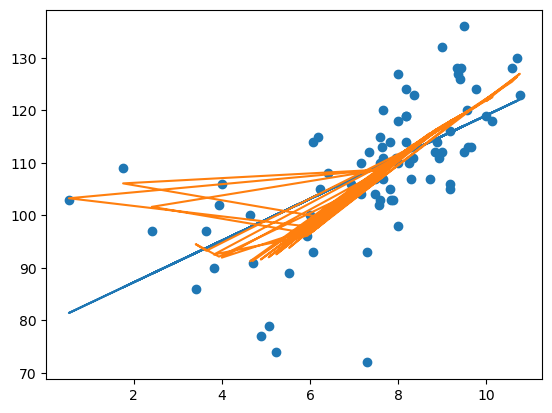

degree= 6
berfor poly 0.4016146290075625
after poly 0.5415241040983856


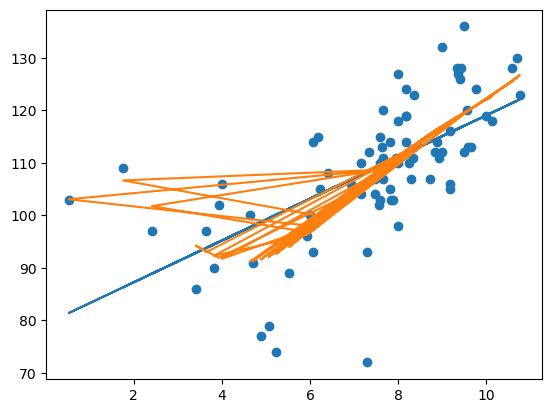

degree= 7
berfor poly 0.4016146290075625
after poly 0.5417377384222807


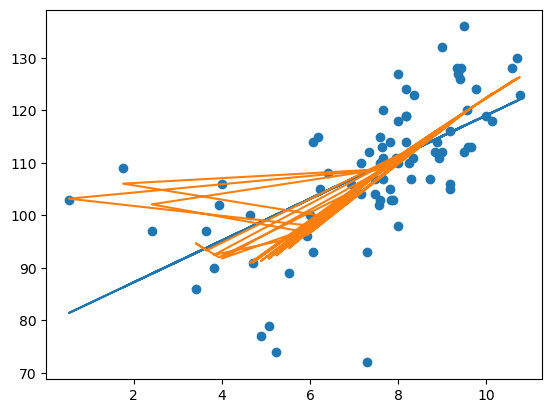

degree= 8
berfor poly 0.4016146290075625
after poly 0.541910838005524


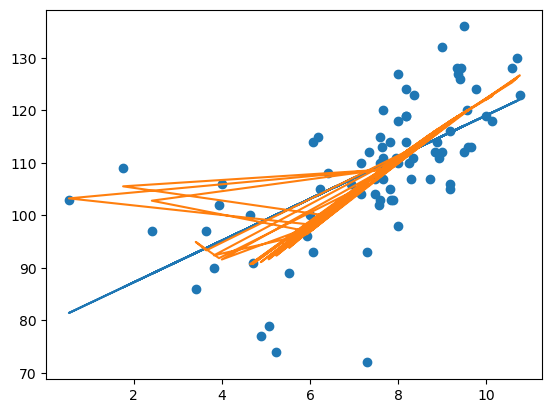

degree= 9
berfor poly 0.4016146290075625
after poly 0.550135426898938


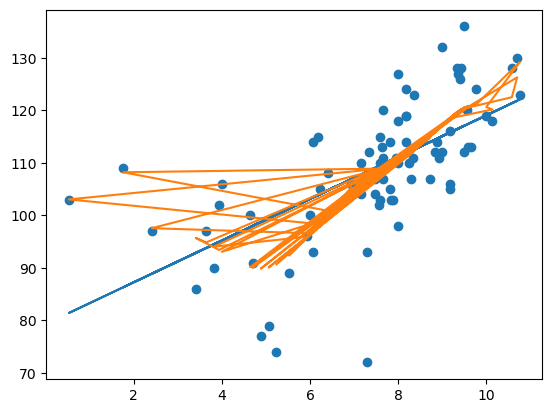

degree= 10
berfor poly 0.4016146290075625
after poly 0.5637377889952966


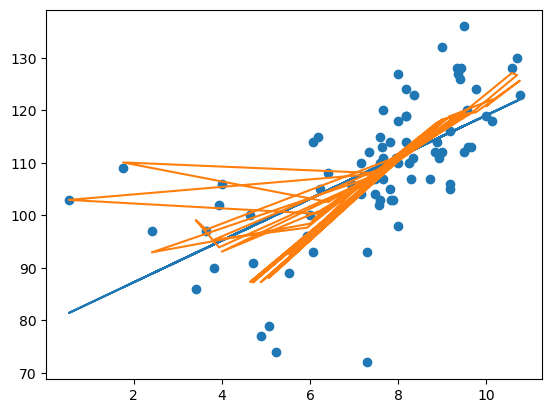

degree= 11
berfor poly 0.4016146290075625
after poly 0.5656805650040249


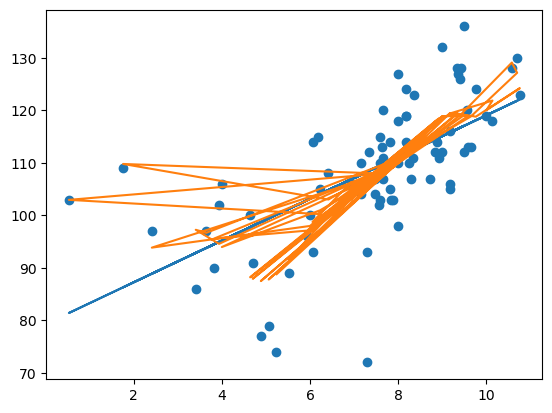

degree= 12
berfor poly 0.4016146290075625
after poly 0.6039507811552361


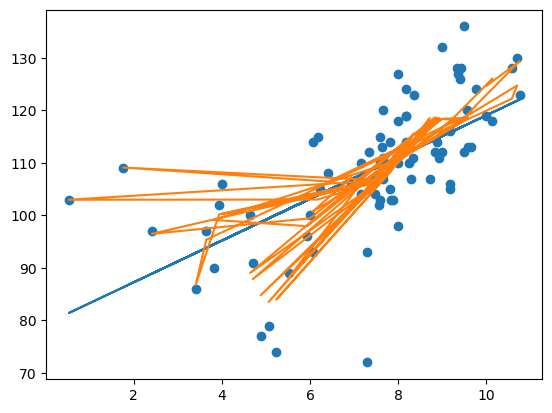

degree= 13
berfor poly 0.4016146290075625
after poly 0.6366568426296608


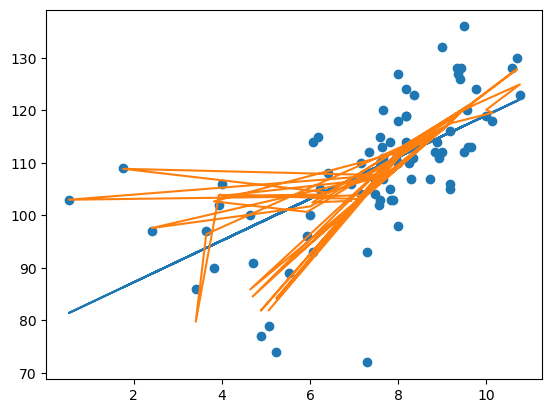

degree= 14
berfor poly 0.4016146290075625
after poly 0.6678554288567131


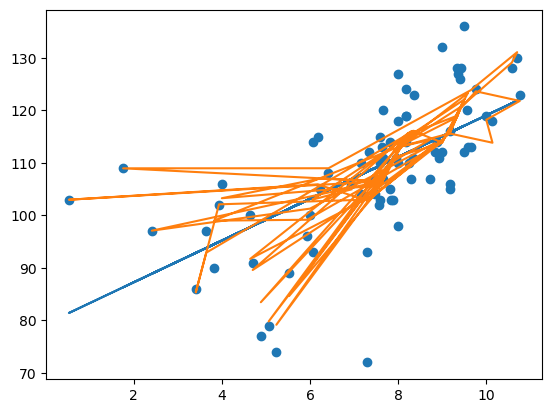

degree= 15
berfor poly 0.4016146290075625
after poly 0.6808906878954764


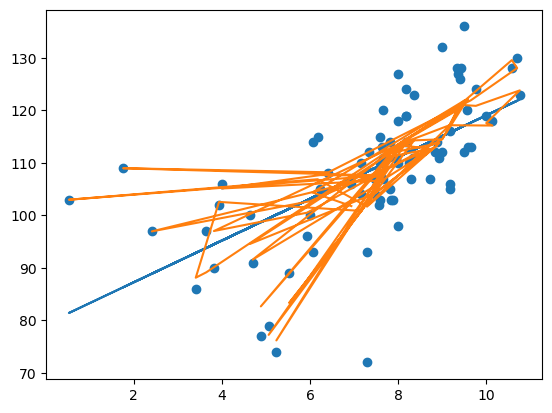

degree= 16
berfor poly 0.4016146290075625
after poly 0.6818373981305003


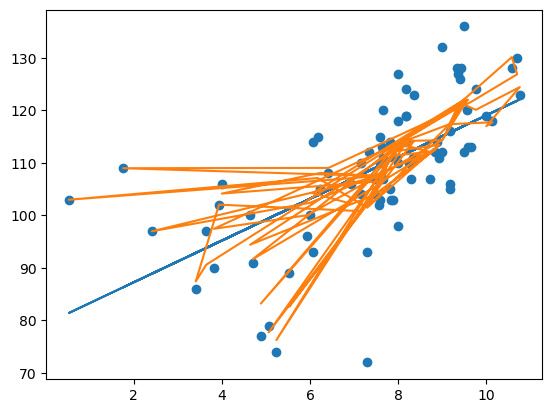

degree= 17
berfor poly 0.4016146290075625
after poly 0.6823746403158231


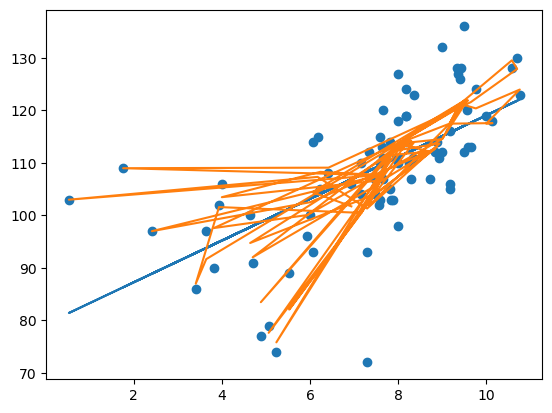

degree= 18
berfor poly 0.4016146290075625
after poly 0.6823603564662608


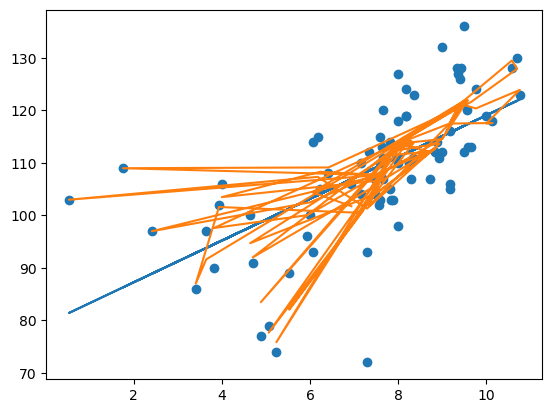

degree= 19
berfor poly 0.4016146290075625
after poly 0.6824271517273297


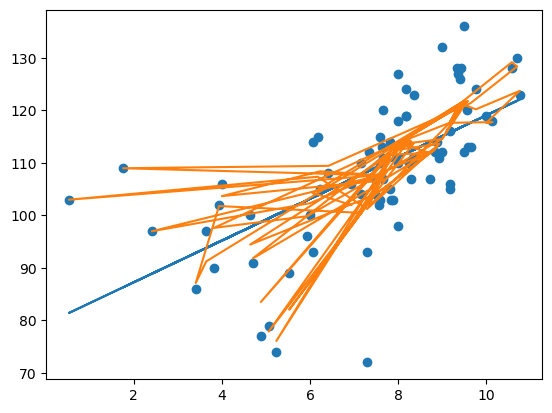

In [37]:
for d in range(1 , 20) :
    poly = PolynomialFeatures(degree = d)
    x_poly=poly.fit_transform(x)
    scl=StandardScaler()
    x_scl=scl.fit_transform(x_poly)
    lr_poly=LinearRegression()
    lr_poly.fit(x_scl,y)
    preds_poly=lr_poly.predict(x_scl)
    print ('degree=',d)
    print('berfor poly',r2_score(y,preds))
    print('after poly',r2_score(y,preds_poly))
    plt.scatter(x,y)
    plt.plot(x,preds)
    plt.plot(x,preds_poly)
    plt.show()
